In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cleaned_metu_ring.csv')

In [3]:
df.head()

,Gender,Residence,Study_Level,Faculty,Grad_School,Visiting_Faculty_GradSchool,Affiliation_Program,Freq_Taxi,Freq_Ring,Freq_Walking,...,Problem_NotClean,Problem_DriverBehavior,Understanding_Routes,Avg_Wait_Time,UseMore_IfFrequent,App_Helping_Ring,MostValuable_Improvement,Overall_Satisfaction,Open_Comments,Department
0,Male,"East Dorms (1st Dorm, 2nd Dorm, 16th Guesthous...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Sometimes,Always,...,Often,Always,1.0,11–15 minutes,Yes,5.0,Better route coverage,2.0,The buses should have a much better indication...,Electrical and Electronics Engineering
1,Female,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Arts and Sciences,NaN,NaN,NaN,Rarely,Often,Sometimes,...,Sometimes,Never,3.0,11–15 minutes,Yes,5.0,More frequent buses,4.0,NaN,Psychology
2,Female,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Always,Always,...,Often,Never,5.0,11–15 minutes,Yes,5.0,Better route coverage,3.0,NaN,Computer Engineering
3,Male,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Always,Always,...,Never,Never,5.0,5–10 minutes,Yes,2.0,Better route coverage,3.0,The weekday evening busses’ route is overlappi...,Civil Engineering
4,Male,Off-campus (within walking distance),Undergraduate (Bachelor’s),Faculty of Economic and Administrative Sciences,NaN,NaN,NaN,Often,Sometimes,Often,...,Never,Never,2.0,11–15 minutes,Yes,4.0,Better real-time tracking,4.0,NaN,International Relations


In [4]:
problem_cols = [col for col in df.columns if 'problem' in col.lower()]

In [5]:
problem_cols

['Problem_LateBus',
 'Problem_TooCrowded',
 'Problem_LongWait',
 'Problem_NotMyRoute',
 'Problem_RouteConfusing',
 'Problem_HoursMismatch',
 'Problem_NotClean',
 'Problem_DriverBehavior']

In [6]:
list(map(lambda col: df[col].value_counts(dropna=False), problem_cols))

[Problem_LateBus
 Sometimes    127
 Rarely        85
 Often         62
 Never         29
 Always        22
 Name: count, dtype: int64,
 Problem_TooCrowded
 Often        151
 Always       103
 Sometimes     56
 Rarely        14
 Never          1
 Name: count, dtype: int64,
 Problem_LongWait
 Often        130
 Sometimes     96
 Always        75
 Rarely        22
 Never          2
 Name: count, dtype: int64,
 Problem_NotMyRoute
 Often        87
 Sometimes    81
 Rarely       78
 Always       45
 Never        34
 Name: count, dtype: int64,
 Problem_RouteConfusing
 Never        123
 Rarely        89
 Sometimes     47
 Often         40
 Always        26
 Name: count, dtype: int64,
 Problem_HoursMismatch
 Sometimes    108
 Often         72
 Rarely        69
 Always        39
 Never         37
 Name: count, dtype: int64,
 Problem_NotClean
 Never        118
 Rarely       108
 Sometimes     50
 Often         29
 Always        20
 Name: count, dtype: int64,
 Problem_DriverBehavior
 Never        1

In [7]:
df['Residence'] = df['Residence'].replace('Postgraduate Guesthouse', 'West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)')

In [8]:
problem_map = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Often": 3,
    "Always": 4
}

In [9]:
def map_and_assign(df, col, problem_map):
    if col in df.columns:
        if not pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].map(problem_map)
            print(f"✓ Mapped {col} to numeric")
        else:
            print(f"✓ {col} is already numeric")

In [10]:
list(map(lambda col: map_and_assign(df, col, problem_map), problem_cols))

✓ Mapped Problem_LateBus to numeric
✓ Mapped Problem_TooCrowded to numeric
✓ Mapped Problem_LongWait to numeric
✓ Mapped Problem_NotMyRoute to numeric
✓ Mapped Problem_RouteConfusing to numeric
✓ Mapped Problem_HoursMismatch to numeric
✓ Mapped Problem_NotClean to numeric
✓ Mapped Problem_DriverBehavior to numeric


[None, None, None, None, None, None, None, None]

Overall problem ranking

In [11]:
problem_prevalence = {}
for col in problem_cols:
    if col in df.columns:
        # Count valid responses (non-null)
        valid_responses = df[col].notna().sum()
        # Count "Often" (3) or "Always" (4)
        often_always = ((df[col] >= 3) & (df[col] <= 4)).sum()
        # Calculate percentage
        pct = (often_always / valid_responses * 100) if valid_responses > 0 else 0
        problem_prevalence[col.replace('Problem_', '')] = {
            'Count_OftenAlways': often_always,
            'Valid_Responses': valid_responses,
            'Pct_OftenAlways': pct
        }

In [12]:
problem_ranking = pd.DataFrame(problem_prevalence).T
problem_ranking = problem_ranking.sort_values('Pct_OftenAlways', ascending=False)
problem_ranking = problem_ranking.round(1)

In [13]:
problem_ranking

,Count_OftenAlways,Valid_Responses,Pct_OftenAlways
TooCrowded,254.0,325.0,78.2
LongWait,205.0,325.0,63.1
NotMyRoute,132.0,325.0,40.6
HoursMismatch,111.0,325.0,34.2
LateBus,84.0,325.0,25.8
RouteConfusing,66.0,325.0,20.3
NotClean,49.0,325.0,15.1
DriverBehavior,25.0,325.0,7.7


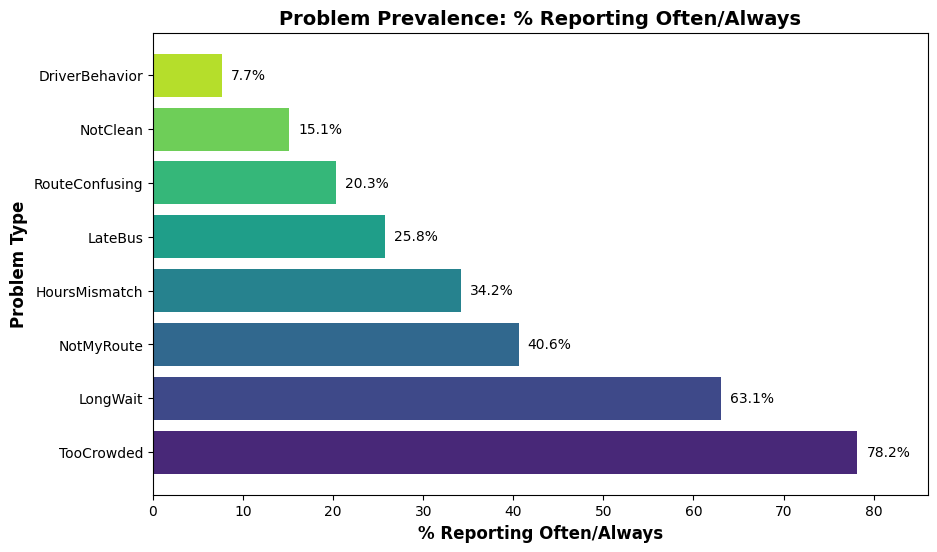

In [14]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(problem_ranking))
bars = plt.barh(problem_ranking.index, problem_ranking['Pct_OftenAlways'], color=colors)
plt.xlabel('% Reporting Often/Always', fontsize=12, fontweight='bold')
plt.ylabel('Problem Type', fontsize=12, fontweight='bold')
plt.title('Problem Prevalence: % Reporting Often/Always', fontsize=14, fontweight='bold')
plt.xlim(0, max(problem_ranking['Pct_OftenAlways']) * 1.1)

# Add value labels on bars
for i, (idx, row) in enumerate(problem_ranking.iterrows()):
    plt.text(row['Pct_OftenAlways'] + 1, i, f"{row['Pct_OftenAlways']:.1f}%", 
             va='center', fontsize=10)

Problem Prevalence by Residence

In [15]:
top_3_problems = problem_ranking.head(3).index.tolist()
top_3_cols = [f'Problem_{prob}' for prob in top_3_problems]

In [16]:
top_3_cols

['Problem_TooCrowded', 'Problem_LongWait', 'Problem_NotMyRoute']

In [17]:
residence_problem_prevalence = {}

for residence in df['Residence'].dropna().unique():
    res_df = df[df['Residence'] == residence]
    residence_problem_prevalence[residence] = {}
    
    for prob_name, col in zip(top_3_problems, top_3_cols):
        if col in res_df.columns:
            valid = res_df[col].notna().sum()
            often_always = ((res_df[col] >= 3) & (res_df[col] <= 4)).sum()
            pct = (often_always / valid * 100) if valid > 0 else 0
            residence_problem_prevalence[residence][prob_name] = pct


In [18]:
residence_problem_df = pd.DataFrame(residence_problem_prevalence).T
residence_problem_df = residence_problem_df.round(1)


In [19]:
residence_problem_df

,TooCrowded,LongWait,NotMyRoute
"East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.)",64.5,59.4,31.9
"West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)",92.3,68.4,56.4
Off-campus (within walking distance),85.7,71.4,35.7
Off-campus (far from campus),80.4,58.9,30.4


In [20]:
plot_data = residence_problem_df.reset_index()
plot_data = plot_data.rename(columns={'index': 'Residence'})


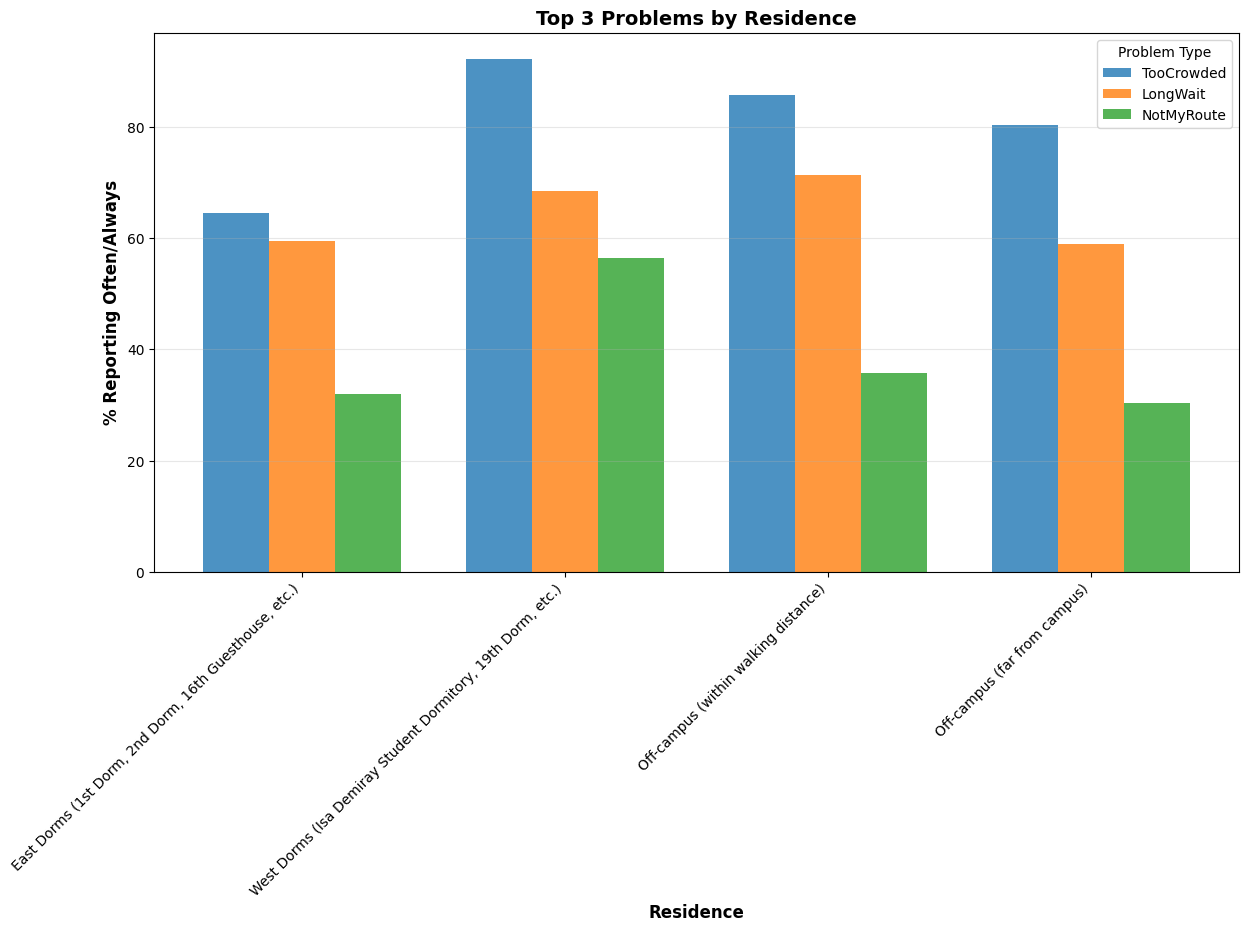

In [21]:
x = np.arange(len(plot_data))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 7))
for i, prob in enumerate(top_3_problems):
    offset = (i - 1) * width
    bars = ax.bar(x + offset, plot_data[prob], width, label=prob, alpha=0.8)

ax.set_xlabel('Residence', fontsize=12, fontweight='bold')
ax.set_ylabel('% Reporting Often/Always', fontsize=12, fontweight='bold')
ax.set_title('Top 3 Problems by Residence', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(plot_data['Residence'], rotation=45, ha='right')
ax.legend(title='Problem Type', fontsize=10)
ax.grid(axis='y', alpha=0.3)
plt.show()

In [22]:
problem_burden = (df[problem_cols] >= 3).sum(axis=1)

In [23]:
df['Problem_Burden'] = problem_burden

In [24]:
print(f"  Mean: {df['Problem_Burden'].mean():.2f}")
print(f"  Median: {df['Problem_Burden'].median():.0f}")
print(f"  Std: {df['Problem_Burden'].std():.2f}")
print(f"  Range: [{df['Problem_Burden'].min():.0f}, {df['Problem_Burden'].max():.0f}]")


  Mean: 2.85
  Median: 3
  Std: 1.60
  Range: [0, 7]


In [25]:
burden_by_residence = df.groupby('Residence')['Problem_Burden'].agg(['mean', 'std', 'count']).round(2)
burden_by_residence.columns = ['Mean_Burden', 'Std_Burden', 'N']
burden_by_residence = burden_by_residence.sort_values('Mean_Burden', ascending=False)


In [26]:
df['Residence'].value_counts()

Residence
East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.)         138
West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)    117
Off-campus (far from campus)                                    56
Off-campus (within walking distance)                            14
Name: count, dtype: int64

In [27]:
burden_by_residence

,Mean_Burden,Std_Burden,N
Residence,,,
Off-campus (within walking distance),3.14,1.23,14
"West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)",3.08,1.43,117
Off-campus (far from campus),3.02,1.65,56
"East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.)",2.56,1.70,138


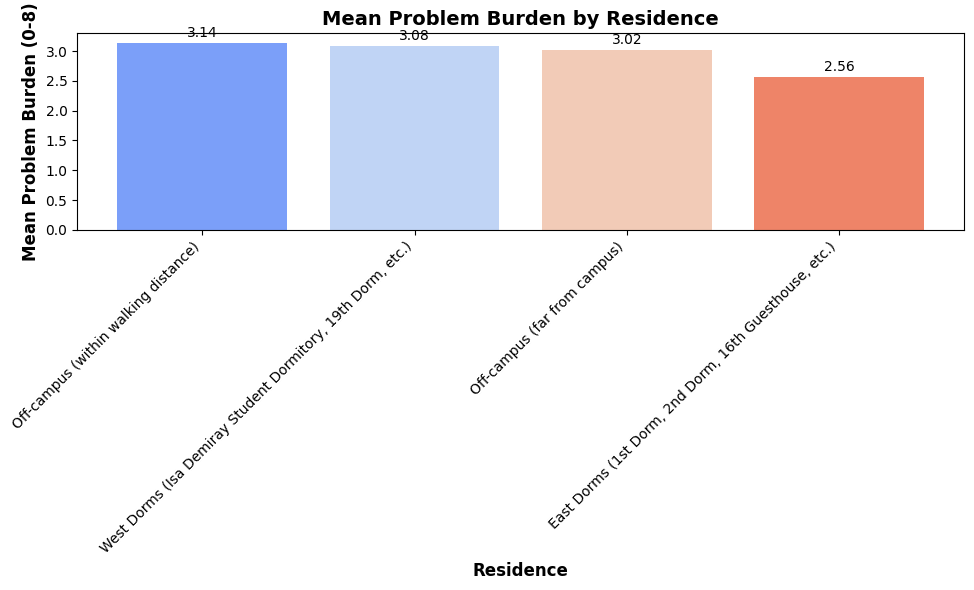

In [28]:
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(burden_by_residence)), burden_by_residence['Mean_Burden'], 
               color=sns.color_palette("coolwarm", len(burden_by_residence)))
plt.xlabel('Residence', fontsize=12, fontweight='bold')
plt.ylabel('Mean Problem Burden (0-8)', fontsize=12, fontweight='bold')
plt.title('Mean Problem Burden by Residence', fontsize=14, fontweight='bold')
plt.xticks(range(len(burden_by_residence)), burden_by_residence.index, rotation=45, ha='right')

# Add value labels
for i, (idx, row) in enumerate(burden_by_residence.iterrows()):
    plt.text(i, row['Mean_Burden'] + 0.1, f"{row['Mean_Burden']:.2f}", 
             ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('../data/figure_p3_problem_burden.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
top_2_problems = top_3_problems[:2]
top_2_cols = [f'Problem_{prob}' for prob in top_2_problems]

satisfaction_by_problem = {}

for prob_name, col in zip(top_2_problems, top_2_cols):
    if col in df.columns:
        # Create binary: Often/Always (>=3) vs Not Often/Always (<3)
        df[f'{prob_name}_High'] = (df[col] >= 3)
        
        # Calculate mean satisfaction for each group
        high_satisfaction = df[df[f'{prob_name}_High']]['Overall_Satisfaction'].mean()
        low_satisfaction = df[~df[f'{prob_name}_High']]['Overall_Satisfaction'].mean()
        
        high_n = df[df[f'{prob_name}_High']]['Overall_Satisfaction'].notna().sum()
        low_n = df[~df[f'{prob_name}_High']]['Overall_Satisfaction'].notna().sum()
        
        satisfaction_by_problem[prob_name] = {
            'OftenAlways_Mean': high_satisfaction,
            'NotOftenAlways_Mean': low_satisfaction,
            'Difference': high_satisfaction - low_satisfaction,
            'OftenAlways_N': high_n,
            'NotOftenAlways_N': low_n
        }

satisfaction_df = pd.DataFrame(satisfaction_by_problem).T.round(2)
print("\nMean Overall Satisfaction by Problem Experience:")
print(satisfaction_df)



Mean Overall Satisfaction by Problem Experience:
            OftenAlways_Mean  NotOftenAlways_Mean  Difference  OftenAlways_N  \
TooCrowded              2.85                 3.32       -0.47          254.0   
LongWait                2.75                 3.32       -0.57          205.0   

            NotOftenAlways_N  
TooCrowded              71.0  
LongWait               120.0  


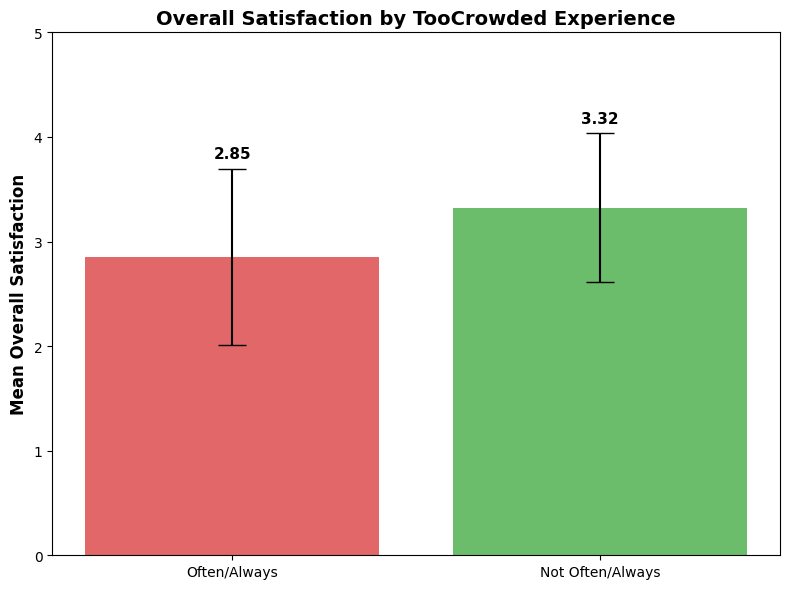

In [30]:
top_problem = top_2_problems[0]
top_col = f'Problem_{top_problem}'

# Prepare data
high_group = df[df[f'{top_problem}_High']]['Overall_Satisfaction'].dropna()
low_group = df[~df[f'{top_problem}_High']]['Overall_Satisfaction'].dropna()

fig, ax = plt.subplots(figsize=(8, 6))
categories = ['Often/Always', 'Not Often/Always']
means = [high_group.mean(), low_group.mean()]
stds = [high_group.std(), low_group.std()]

bars = ax.bar(categories, means, yerr=stds, capsize=10, alpha=0.7, 
              color=['#d62728', '#2ca02c'])

ax.set_ylabel('Mean Overall Satisfaction', fontsize=12, fontweight='bold')
ax.set_title(f'Overall Satisfaction by {top_problem} Experience', fontsize=14, fontweight='bold')
ax.set_ylim(0, 5)

# Add value labels
for i, (cat, mean_val) in enumerate(zip(categories, means)):
    ax.text(i, mean_val + stds[i] + 0.1, f"{mean_val:.2f}", 
            ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [31]:
summary_stats = {
    'Total_Respondents': len(df),
    'Top_Problem': top_3_problems[0],
    'Top_Problem_Pct': problem_ranking.loc[top_3_problems[0], 'Pct_OftenAlways'],
    'Second_Problem': top_3_problems[1],
    'Second_Problem_Pct': problem_ranking.loc[top_3_problems[1], 'Pct_OftenAlways'],
    'Third_Problem': top_3_problems[2],
    'Third_Problem_Pct': problem_ranking.loc[top_3_problems[2], 'Pct_OftenAlways'],
    'Mean_Problem_Burden': df['Problem_Burden'].mean(),
    'Highest_Burden_Residence': burden_by_residence.index[0],
    'Highest_Burden_Mean': burden_by_residence.iloc[0]['Mean_Burden'],
}

In [32]:
summary_df = pd.DataFrame([summary_stats])


In [33]:
summary_df.T

,0
Total_Respondents,325
Top_Problem,TooCrowded
Top_Problem_Pct,78.2
Second_Problem,LongWait
Second_Problem_Pct,63.1
Third_Problem,NotMyRoute
Third_Problem_Pct,40.6
Mean_Problem_Burden,2.849231
Highest_Burden_Residence,Off-campus (within walking distance)
Highest_Burden_Mean,3.14
